# 0. Define straight forward the layout for the padlock
1. Input the umber of content tiles you want to have (recommended 1, 4, 9; will be reduced to next lower square number later)

2. Input the number of randomly colored frame lines (be careful: the more frames the less content space)

3. Input the line size  (the bigger the number the bolder the frame gets)

In [358]:
# Global parameters for the 3 key design elements

# Init with minimum default
tiles = 1
frames = 6
lines = 3

tiles = int(input("Enter number of tiles: "))
frames = int(input("Enter number of frames: "))
lines = int(input("Enter size of lines: "))

print(f"Ok., I will create {tiles} tile(s), each having {frames} frame(s) with a line size of {lines}.")

Ok., I will create 1 tile(s), each having 6 frame(s) with a line size of 3.


# 1. Choose input Widgets for a alternative and more comfortable input

In [356]:
import ipywidgets
from IPython.display import display

# Init with minimum default
tiles = 1
frames = 6
lines = 3

# Dropdown widget for the selection of "tiles" (either 1 or 4)
tiles_widget = ipywidgets.Dropdown(
    options=[1, 4, 9],  # Allowed options: 1 or 9
    value=1,  # Default selection
    description="Number of Tiles:",
)

# IntText widget for the selection of "frames"
frames_widget = ipywidgets.IntText(
    value=6,  # Default value
    description="Number of Frames:",
    min=1,    # Minimum value
    max=12,  # Maximum value
    step=1,   # Step size
)

# Slider widget for the selection of "lines" (range from 3 to 9)
lines_widget = ipywidgets.IntSlider(
    value=6,  # Default value
    min=1,    # Minimum value
    max=9,    # Maximum value
    step=1,   # Step size
    description="Size of Lines:",
)

# Function to retrieve and print the values after user interaction
def get_values(change=None):
    global tiles, frames, lines
    
    tiles = tiles_widget.value
    frames = frames_widget.value
    lines = lines_widget.value

# Display the widgets
display(tiles_widget, frames_widget, lines_widget)

# Use 'observe' to call get_values() whenever the widget's value changes
tiles =  tiles_widget.observe(get_values, names='value')
frames = frames_widget.observe(get_values, names='value')
lines = lines_widget.observe(get_values, names='value')

Dropdown(description='Number of Tiles:', options=(1, 4, 9), value=1)

IntText(value=6, description='Number of Frames:')

IntSlider(value=6, description='Size of Lines:', max=9, min=1)

# 2.a Showcase the layout based on selected input parameters

Number of tiles: 1
Number of frames: 6
Size of lines: 3
This is how the template looks like:


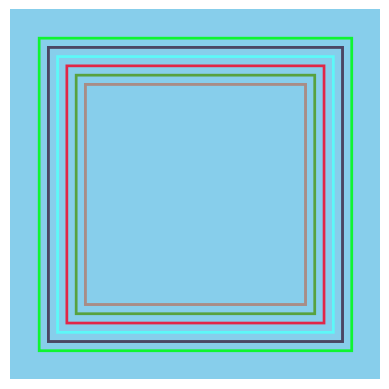

In [373]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps

# Print the selected values
print(f"Number of tiles: {tiles}")
print(f"Number of frames: {frames}")
print(f"Size of lines: {lines}")

# Design variables
tile_number = tiles                    # Will be adjusted to lower square number (1=big, 4=medium, 9=small size)
frame_number = frames                    # Must be any number between 1 and 12
frame_line_width = lines                  # Recommendation of line size is 6 (the bigger the bolder)

# frame_object = Image.open('/Downloads/DIT_NFT_Logo.png')   
frame_object = None                

tiles_per_row = math.floor(math.sqrt(tile_number))  # Calculate next smaller squared layout
tiles_per_column = tiles_per_row                    # Only squared wallpapers

# Create a basic tile image using Pillow
tile_size = (400, 400)
tile = Image.new("RGB", tile_size, "grey")           # Initially a false color

# Global variable
hash_input = ""                                     # Initialize, reset or empty hash input

# Design wallpaper by inner pattrern
def assemble_wallpaper(tile, rows=tiles_per_row, cols=tiles_per_column):
    global hash_input
     
    tile = Image.new("RGB", (tile_size[0] * cols, tile_size[1] * rows), "skyblue")

    hash_input = ""                                 # Initialize, reset or empty hash input

    for i in range(rows):
        for j in range(cols):
  
            # Patterm dimensions
            width, height = 300, 300                # Pattern square room
            nested_depth = frame_number             # Number of nested squares
            distance = 10                           # Distance between squares

            # Sizing of square pattern
            width, height = 360, 360
            pattern = Image.new('RGB', (width, height), 'skyblue')
            draw = ImageDraw.Draw(pattern)

            # Drawing nested rectangles
            for x in range(nested_depth):

                # Position and size of outer rectangle
                if x == 0:
                    start_x, start_y = distance, distance
                    rect_width = 340
                    rect_height = 340

                # Defining random RGB color per square
                red_value = round(rnd.random()*255)
                green_value = round(rnd.random()*255)
                blue_value = round(rnd.random()*255)
                random_color = (red_value, green_value, blue_value)
                            
                hash_input = hash_input + str(red_value) + str(green_value) + str(blue_value)
        
                # Draw frame
                draw.rectangle(
                    [start_x, start_y, start_x + rect_width, start_y + rect_height], 
                    outline=(random_color),
                    width=frame_line_width)
    
                # Adjust position an size for next smaller square
                start_x += distance
                start_y += distance
                rect_width -= 2 * distance
                rect_height -= 2 * distance

                # Fit in frame content
                if x == nested_depth:
                    pattern.paste(frame_object)
                    draw = ImageDraw.Draw(pattern)
            
            tile.paste(pattern, (j * tile_size[0] + (2*distance), i * tile_size[1] + (2*distance)))  
            
            draw = ImageDraw.Draw(tile)

    return tile

# Generate and display wallpaper pattern

print(f"This is how the template looks like:")

wallpaper = assemble_wallpaper(tile)
plt.imshow(wallpaper)
plt.axis("off")
plt.show()



# 2.a Module for creating image content of a single tile (without frame)
---> Note: Can be executed stand-only either as preview of a tile or to grap tile as single PNG-file (check for output_tile_image.png)

FileUpload(value=(), accept='.jpg,.jpeg,.png,.gif', description='Upload image')

Textarea(value='', description='or', layout=Layout(width='50'), placeholder='Enter a text, if no image is uplo…

Text(value='', description='Optional:', layout=Layout(width='100%'), placeholder='URL as hyperlink "behind" th…

Button(description='Create tile', style=ButtonStyle())

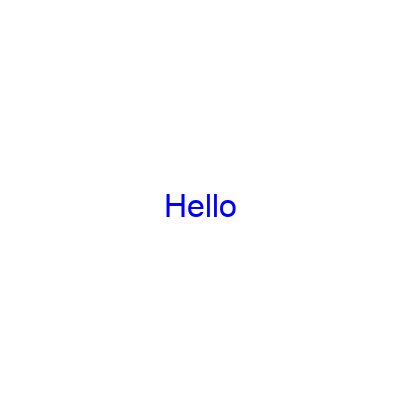

Tile image was saved as 'output_tile_image.png'.


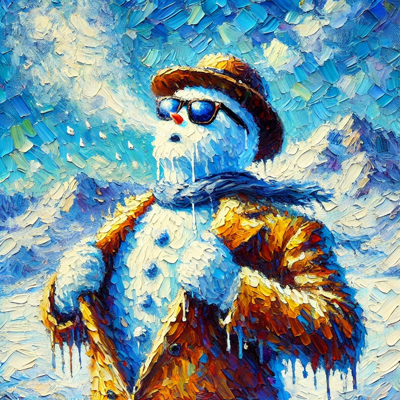

Tile image was saved as 'output_tile_image.png'.


In [364]:
import ipywidgets
from IPython.display import display, clear_output, Image, HTML
from PIL import Image, ImageDraw, ImageFont
import io

def fill_tile_with_content_and_link(tile_width, tile_height):
    # Input requests: either image or text as content + an optional URL
    image_upload_widget = ipywidgets.FileUpload(
        description='Upload image',
        # accept='image/*',
        accept='.jpg,.jpeg,.png,.gif',
        multiple=False
    )
    text_input_widget = ipywidgets.Textarea(
        description='or',
        placeholder='Enter a text, if no image is uploaded.',
        layout=ipywidgets.Layout(width='50'),
        rows=6,
        value=''  # Default is empty
    )
    url_widget = ipywidgets.Text(
        description='Optional:',
        placeholder='URL as hyperlink "behind" the content ...',
        layout=ipywidgets.Layout(width='100%'),
        value=''  # Default is empty
    )

    # Display widgets
    display(image_upload_widget, text_input_widget, url_widget)
    
    # Function to process input
    def on_submit(change):
        # If an image is uploaded, open image
        if image_upload_widget.value:
            # Fetch always first file from upload bunch only
            file_content = image_upload_widget.value[0]['content']
                
            # Create image from byte stream which is converted from uploaded content before
            image = Image.open(io.BytesIO(file_content))
            
            # Empty upload bunch before selecting content for next tile
            # image_upload_widget.value = ()

        # If a text was entered, convert it to an image as well
        elif text_input_widget.value:
            # If no image is uploaded, convert text into image
            text = text_input_widget.value
            
            # Define size of text image as big as tile
            image_size = (tile_width, tile_height)
            
            # Create a new, empty image
            image = Image.new('RGB', image_size, (255, 255, 255))
            draw = ImageDraw.Draw(image)
            
            # Font and font size (if not available rely on system font)
            try:
                # Linux
                # font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", size=12)
                # MacOS
                font = ImageFont.truetype("/Library/Fonts/Arial.ttf", size=32)
                # Windows
                # font = ImageFont.truetype("C:\\Windows\\Fonts\\arial.ttf", size=48)
            except IOError:
                font = ImageFont.load_default()

            # Calculate size of text
            bbox = draw.textbbox((0, 0), text, font=font)
            text_width = bbox[2] - bbox[0]
            text_height = bbox[3] - bbox[1]

            # Calculate centered position
            text_x = (image.width - text_width) / 2     # Horizontally
            text_y = (image.height - text_height) / 2   # Vertically

            # Draw text into image
            draw.text((text_x, text_y), text, font=font, fill="blue")
          
        else:
            print("Please either upload an image or input a text (otherwise tile will have no visual content)")
            return
        
        # Adjust image to tile size
        image = image.resize((tile_width, tile_height))
        # Test show in extra output window
        # image.show()
        
        # Tile image (e.g. a white tile)
        tile = Image.new('RGB', (tile_width, tile_height), (255, 255, 255))
        tile.paste(image, (0, 0))
        
        output_image_path = "output_tile_image.png"
        # Save tile image
        tile.save(output_image_path)
        
        # If a URL was entered, its used as hyperlink
        if url_widget.value:
            # Place URL as Hyperlink in HTML
            display(HTML(f'<a href="{url_widget.value}" target="_blank">'
                         f'<img src="{output_image_path}" width="{tile_width}" height="{tile_height}"></a>'))
        else:
            display(tile)
            # display(HTML(f'<img src="{output_image_path}" width="{tile_width}" height="{tile_height}">'))
        
        # Confirm saving of tile image
        print(f"Tile image was saved as '{output_image_path}'.")

        # Reset/empty upload widget
        image_upload_widget.value = ()
    
    # Button to confirm input and generate the overall image for the tile, including a possible hyperlink behind it
    
    create_button = ipywidgets.Button(description="Create tile")

    # def on_button_click(b):
    #    display(tile)
    #   clear_output(wait=True)

    create_button.on_click(on_submit)
    # create_button.on_click(on_button_click)
    display(create_button)

    return tile

# Test funftion call with a fixed sample tile size
tile_module = fill_tile_with_content_and_link(400, 400)  # Example: width=400 pixel, height=400 pixel

# 2.b Assemble wallpaper by adding image content tile by tile
---> Note: Filling order is from left to right and top to bottom; image file "output_tile_image.png" always stores most recent tile

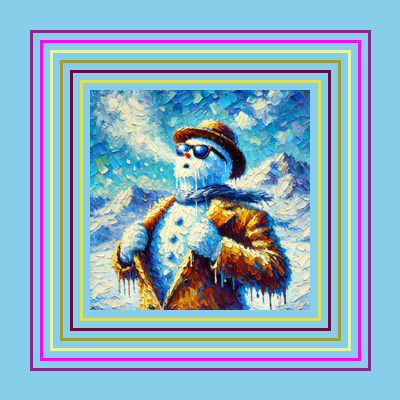

In [366]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps

# Print the selected values
print(f"Number of tiles: {tiles}")
print(f"Number of frames: {frames}")
print(f"Size of lines: {lines}")

# frame_object = Image.open('/Downloads/DIT_NFT_Logo.png')   
frame_object = None                

tiles_per_row = math.floor(math.sqrt(tiles))        # Calculate next smaller squared layout
tiles_per_column = tiles_per_row                    # Only squared wallpapers

# Create a basic tile image using Pillow
tile_size = (400, 400)
tile = Image.new("RGB", tile_size, "red")           # Initially a false color

# Global variable for labeling and naming wallpaper
hash_input = ""                                     # Initialize, reset or empty hash input

# Design wallpaper by inner pattern
def assemble_wallpaper(rows=tiles_per_row, cols=tiles_per_column):
    global hash_input
     
    tile = Image.new("RGB", (tile_size[0] * cols, tile_size[1] * rows), "skyblue")

    hash_input = ""                                 # Initialize, reset or empty hash input

    for i in range(rows):
        for j in range(cols):
  
            # Square patterm dimensions
            width, height = 300, 300                # Outer pattern square
            nested_depth = frames                   # Number of nested squares
            distance = 10                           # Distance between squares

            # Sizing of square pattern
            pattern_width, pattern_height = 360, 360
            pattern = Image.new('RGB', (pattern_width, pattern_height), 'skyblue')
            draw = ImageDraw.Draw(pattern)

            # Drawing nested rectangles
            for x in range(nested_depth):

                # Position and size of outer rectangle
                if x == 0:
                    start_x, start_y = distance, distance
                    rect_width = 340
                    rect_height = 340

                # Defining random RGB color per square
                red_value = round(rnd.random()*255)
                green_value = round(rnd.random()*255)
                blue_value = round(rnd.random()*255)
                random_color = (red_value, green_value, blue_value)

                # Concatentating random color values to a label for the wallpaper (additionally hashed later)        
                hash_input = hash_input + str(red_value) + str(green_value) + str(blue_value)
        
                # Draw next inner frame
                draw.rectangle(
                    [start_x, start_y, start_x + rect_width, start_y + rect_height], 
                    outline=(random_color),
                    width=frame_line_width)
    
                # Adjust position an size for next smaller square/frame
                start_x += distance
                start_y += distance
                rect_width -= 2 * distance
                rect_height -= 2 * distance

                # Fit in nested frames
                if x == nested_depth:
                    pattern.paste(frame_object)
                    draw = ImageDraw.Draw(pattern)

                tile.paste(pattern, (j * tile_size[0] + (2*distance), i * tile_size[1] + (2*distance)))  

            # !!! Filling inner part of frames with content !!!
            # pattern_image = Image.new('RGB', (rect_width-distance,rect_height-distance), 'grey')
            pattern_image = fill_tile_with_content_and_link(rect_width-distance,rect_height-distance)
            # pattern_image.show()
            pattern_image = Image.open("output_tile_image.png")
            pattern_image = pattern_image.resize((rect_width, rect_height))
            tile.paste(pattern_image, (start_x + 2* distance, start_y + 2* distance))

            clear_output(wait=True)

    return tile

# Generate and display wallpaper pattern

print(f"Please start adding content to each tile (order: from left to right and top to bottom):")

tile = Image.new('RGB', (100, 100), 'grey')
wallpaper = assemble_wallpaper()
display(wallpaper)
# plt.imshow(wallpaper)
# plt.axis("off")
# plt.show()

## 3. Calculate a unique hash for NFT:
-> The hash input is dertermined by concatenating all single and randomly defined (RGB) color values

In [368]:
import hashlib

print(f"These are the randomly created RGB values concatenated tile by tile and frame by frame:")
print(hash_input)
print()

# Convert hash string into byte format UTF-8
hash_bytes = hash_input.encode('utf-8')

# Calcualation of hash (first choice is MD5 to keep it simple, otherwise SHA-256 could be used too)
NFT_hash = hashlib.md5(hash_bytes)

# Output of hash value as hexadecimal string
NFT_hex = NFT_hash.hexdigest()

# Short for SHA-256: NFT_hex = hashlib.sha256(hash_bytes.encode('utf-8')).hexdigest()

print (f"The following key was calculated as hash over all colours in order to make your NFT unique for registration:")
print(NFT_hex)

These are the randomly created RGB values concatenated tile by tile and frame by frame:
138391372431024622424517016115753101125621622888

The following key was calculated as hash over all colours in order to make your NFT unique for registration:
b0abbe02764ba3d88e7a8dfa1c889780


# 4.a - Option 1:  Register NFT hash code in a JSON database

In [369]:
import json
import os
import time
from datetime import datetime

def create_or_update_database(db_filename, nft_data, tiles, frames, line):
    # Check if the database file exists
    if os.path.exists(db_filename):
        # Open the existing database
        with open(db_filename, 'r') as file:
            db = json.load(file)
    else:
        # If the database doesn't exist, create an empty list
        db = []

    # Check if the NFT already exists in the database (primary key check)
    for entry in db:
        if entry['NFT_hex'] == NFT_hex:
            raise ValueError("NFT already registered, please try another!")
        
     # Get the current timestamp in human-readable format
    timestamp = time.time()
    readable_timestamp = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

    # Create a new entry with the required fields
    new_entry = {
        "NFT_hex": NFT_hex,
        "No. of Tiles": tiles,
        "No. of Frames": frames,
        "Line strength": lines,
        "Registered": readable_timestamp
    }

    # Add the new entry to the database
    db.append(new_entry)

    # Save the updated database back to the file
    with open(db_filename, 'w') as file:
        json.dump(db, file, indent=4)

    print(f"NFT with hash {NFT_hex} has been added successfully on {readable_timestamp}")

# Try to register new NFT:
try:
    create_or_update_database("DIY_NFT_Padlock_Registry.json", NFT_hex, tiles, frames, lines)
except ValueError as e:
    print(e)


NFT with hash b0abbe02764ba3d88e7a8dfa1c889780 has been added successfully on 2025-02-14 16:59:58


# 4.b - Option 2:  Register NFT hash code in a SQL database

In [370]:
import sqlite3
import time
from datetime import datetime

def create_or_update_database(db_filename, NFT_hex, tiles, frames, lines):
    # Connect to the SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS nft_registry (
        NFT_hex TEXT PRIMARY KEY,
        No_of_Tiles INTEGER,
        No_of_Frames INTEGER,
        Line_strength INTEGER,
        Registered TEXT
    )
    ''')

    # Check if the NFT already exists in the database (primary key check)
    cursor.execute('SELECT * FROM nft_registry WHERE NFT_hex = ?', (NFT_hex,))
    existing_nft = cursor.fetchone()

    if existing_nft:
        raise ValueError("NFT already registered, please try another!")

    # Get the current timestamp in human-readable format
    timestamp = time.time()
    readable_timestamp = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

    # Insert the new NFT record into the database
    cursor.execute('''
    INSERT INTO nft_registry (NFT_hex, No_of_Tiles, No_of_Frames, Line_strength, Registered)
    VALUES (?, ?, ?, ?, ?)
    ''', (NFT_hex, tiles, frames, lines, readable_timestamp))

    # Commit the changes and close the connection
    conn.commit()
    conn.close()

    print(f"NFT with hash {NFT_hex} has been added successfully on {readable_timestamp}")

# Example usage:
try:
    create_or_update_database("DIY_NFT_Padlock_Registry.db", NFT_hex, tiles, frames, lines)
except ValueError as e:
    print(e)


NFT with hash b0abbe02764ba3d88e7a8dfa1c889780 has been added successfully on 2025-02-14 17:00:13


# 5. Save wallpaper with unique hash as filename for later use

In [372]:
# Name the wallpaper
output_wallpaper_path = NFT_hex + ".png"

# Save wallpaper as image
wallpaper.save(output_wallpaper_path)
print ("Your wallpaper was saved with hash as image file name: ", output_wallpaper_path)

b0abbe02764ba3d88e7a8dfa1c889780.png
Your wallpaper was saved with hash as image file:  b0abbe02764ba3d88e7a8dfa1c889780.png
